In [1]:
import pandas as pd
#df = pd.read_csv('BSE.NS.csv', index_col=0)

In [2]:
import yfinance as yf
df = yf.download("RELIANCE.BO", period = "1d", interval = "1m")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-03-05 09:15:00+05:30,2160.100098,2165.000000,2155.000000,2161.800049,2161.800049,0
2021-03-05 09:16:00+05:30,2161.199951,2165.850098,2158.699951,2163.550049,2163.550049,4411
2021-03-05 09:17:00+05:30,2163.550049,2167.899902,2161.600098,2166.000000,2166.000000,4837
2021-03-05 09:18:00+05:30,2166.000000,2173.899902,2164.750000,2173.899902,2173.899902,3894
2021-03-05 09:19:00+05:30,2174.500000,2176.750000,2171.050049,2176.750000,2176.750000,3298
...,...,...,...,...,...,...
2021-03-05 10:35:00+05:30,2201.800049,2202.550049,2199.500000,2202.550049,2202.550049,1102
2021-03-05 10:36:00+05:30,2203.000000,2204.000000,2201.000000,2201.050049,2201.050049,415
2021-03-05 10:37:00+05:30,2200.449951,2201.000000,2197.550049,2200.149902,2200.149902,1074


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
open_orig = df['Open'].tolist()
close_orig = df['Close'].tolist()
adj_close_orig = df['Adj Close'].tolist()
volume_orig = df['Volume'].tolist()
high_orig = df['High'].tolist()
low_orig = df['Low'].tolist()
work_list_for_sup = open_orig
work_list_for_res = adj_close_orig
work_ar_sup = np.array(work_list_for_sup)
work_ar_res = np.array(work_list_for_res)
work_mean_sup = np.nanmean(work_ar_sup, dtype=np.float32)
work_mean_res = np.nanmean(work_ar_res, dtype=np.float32)
orig_upper = []
orig_lower = []
for price in work_list_for_sup:
    if np.isnan(price):
        continue
    elif price<work_mean_sup:
        orig_lower.append(price)
for price in work_list_for_res:
    if np.isnan(price):
        continue
    elif price>work_mean_res:
        orig_upper.append(price)
resistance_store = []
support_store = []
resistance_store.append(work_mean_res)
support_store.append(work_mean_sup)

In [4]:
def res_recursive(upper_list, resistance_store):
    new = []
    if len(upper_list)==1:
        flag = 1
    else:
        flag = 0
    if flag == 1:
        return resistance_store
    else:
        mean = np.mean(upper_list, dtype=np.float32)
        resistance_store.append(mean)
        for price in upper_list:
            if np.isnan(price):
                continue
            elif price>mean:
                new.append(price)
        return res_recursive(new, resistance_store)
resistance_store = res_recursive(orig_upper, resistance_store)
resistance_store

[2188.9583, 2197.986, 2202.8381, 2206.02, 2208.3499]

In [5]:
def sup_recursive(lower_list, support_store):
    new = []
    if len(lower_list)==1:
        flag = 1
    else:
        flag = 0
    if flag == 1:
        return support_store
    else:
        mean = np.mean(lower_list, dtype=np.float32)
        support_store.append(mean)
        for price in lower_list:
            if np.isnan(price):
                continue
            elif price<mean:
                new.append(price)
        return sup_recursive(new, support_store)
support_store = sup_recursive(orig_lower, support_store)
support_store

[2188.5042, 2178.899, 2171.2466, 2165.6785, 2161.6165, 2160.65]

Results without filtering the lines which do not have turning points


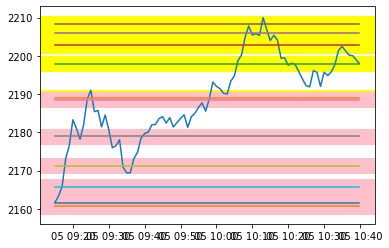

In [9]:
x = df.index.tolist()
plot_data = []
plot_data=0.9*np.array(adj_close_orig)+0.1*np.array(open_orig)
def plotting(resistance_store, support_store, n, tolerance):  
    plt.plot(x, plot_data)
    for price in resistance_store[:n]:
        y = []
        for i in range(len(x)):
            y.append(price)
        plt.plot(x,y)
        for res in y:
            plt.axhspan(res-tolerance, res+tolerance, color='yellow', alpha=0.5)
    for price in support_store[:n]:
        y = []
        for i in range(len(x)):
            y.append(price)
        plt.plot(x,y)
        for sup in y:
            plt.axhspan(sup-tolerance, sup+tolerance, color='pink', alpha=0.5)
    plt.show()
    return None
print('Results without filtering the lines which do not have turning points')
plotting(resistance_store, support_store, 6, 2)

Results after filtering only the lines which have turning points in vicinity


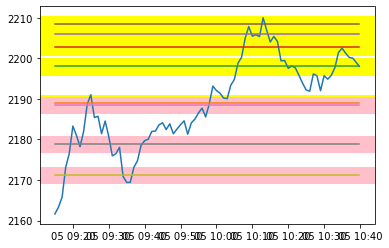

In [23]:
def check_for_res_turns(res, tolerance, approved_res):
    res_df = df[df['Adj Close']>=(res-tolerance)]
    res_df = res_df[res_df['Adj Close']<=(res+tolerance)]
    work_ar = []
    work_ar = np.array(res_df['Adj Close'])
    for i in range(1,len(work_ar)):
        temp_diff = work_ar[i] - work_ar[i-1]
        check_diff = work_ar[i+1] - work_ar[i]
        if temp_diff*check_diff<0:
            approved_res.append(res)
            break
    return approved_res

def check_for_sup_turns(sup, tolerance, approved_sup):
    sup_df = df[df['Open']>=(sup-tolerance)]
    sup_df = sup_df[sup_df['Open']<=(sup+tolerance)]
    work_ar = []
    work_ar = np.array(sup_df['Open'])
    for i in range(1,len(work_ar)-1):
        temp_diff = work_ar[i] - work_ar[i-1]
        check_diff = work_ar[i+1] - work_ar[i]
        if temp_diff*check_diff<0:
            approved_sup.append(sup)
            break
    return approved_sup

approved_res = []
approved_sup = []
for res in resistance_store:
    approved_res = check_for_res_turns(res, 3, approved_res)
for sup in support_store:
    approved_sup = check_for_sup_turns(sup, 3, approved_sup)

print('Results after filtering only the lines which have turning points in vicinity')
plotting(approved_res, approved_sup, 8, 2)